Experiment no 2:To apply Data Cleaning techniques


Cleaned DataFrame:
   id  age sex  height_cm  weight_kg   bmi  hours_sleep  \
0   1   25   M        175         70  22.9            7   
1   2   30   F        160         55  21.5            8   
2   3   22   M        180         75  23.1            6   
3   4   35   F        158         50  20.0            7   
4   5   28   M        170         68  23.5            5   

   exercise_hours_weekly  income_usd         city  
0                    3.0       45000     New York  
1                    3.0       45000  Los Angeles  
2                    4.0       52000      Chicago  
3                    2.0       52000      Houston  
4                    3.0       49000      Phoenix  


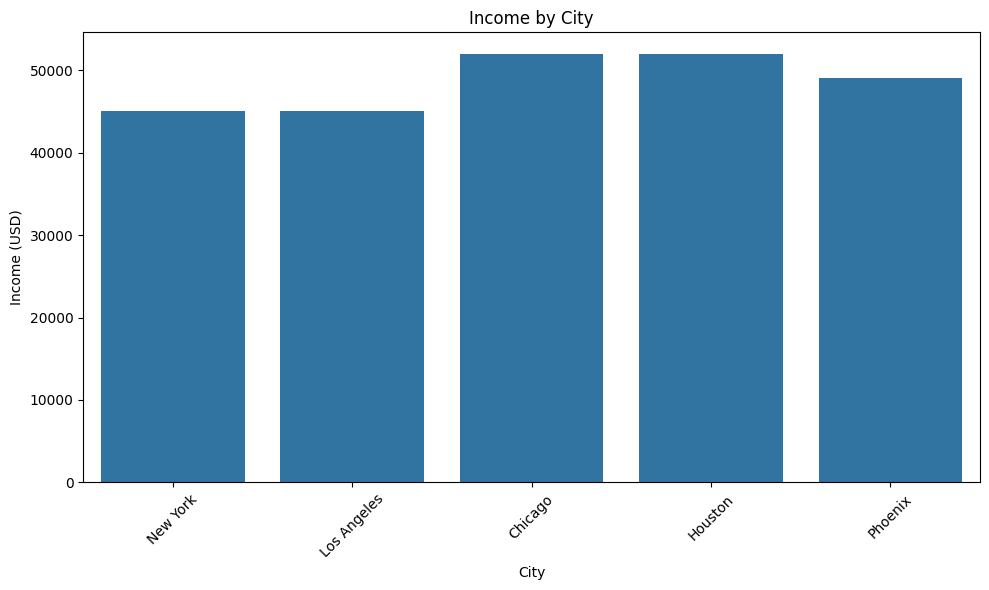

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample data
data = {
    'id': [1, 2, 3, 4, 5],
    'age_sex': ['25_M', '30_F', '22_M', '35_F', '28_M'],
    'height_cm': [175, 160, 180, 158, 170],
    'weight_kg': [70, 55, 75, 50, 68],
    'income_usd': [45000, -45000, 52000, -52000, -49000],
    'bmi': [22.9, 21.5, 23.1, 20.0, 23.5],
    'hours_sleep': [7, 8, 6, 7, 5],
    'exercise_hours_weekly': [3, np.nan, 4, 2, np.nan],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}

# Load data into DataFrame
df = pd.DataFrame(data)

# Split 'age_sex' into 'age' and 'sex'
df[['age', 'sex']] = df['age_sex'].str.split("_", expand=True)
df.drop(['age_sex'], axis=1, inplace=True)

# Convert 'age' to numeric
df['age'] = pd.to_numeric(df['age'])

# Fix negative income values
df['income_usd'] = df['income_usd'].replace({-45000: 45000, -52000: 52000, -49000: 49000})

# Fill missing exercise hours with the mean
mean_exercise = df['exercise_hours_weekly'].mean()
df['exercise_hours_weekly'] = df['exercise_hours_weekly'].fillna(mean_exercise)

# Rearranging columns for readability
df = df[['id', 'age', 'sex', 'height_cm', 'weight_kg', 'bmi', 'hours_sleep',
         'exercise_hours_weekly', 'income_usd', 'city']]

# Display cleaned data
print("Cleaned DataFrame:")
print(df)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='income_usd', data=df)
plt.title("Income by City")
plt.xlabel("City")
plt.ylabel("Income (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
